# __Dynamical tests__

## Outline
- __Dependencies__
- __Noiseless__
    - With dense matrices
    - With poisson matrix
- __With noise using Qiskit AER__
    - With dense matrices
    - With poisson matrix

In [37]:
import numpy as np
from variational_lse_solver import VarLSESolver
from device_var_lse_solver import DeviceVarLSESolver
from device import Device
from device import DeviceType
from qiskit_aer import AerSimulator
from conditioned_matrix import conditionedMatrix
from conditioned_matrix import poissonMatrix
from tqdm import tqdm

qubits = 4
b = np.ones(2**qubits)/np.sqrt(2**qubits)

In [38]:
def TRC_ADA(iteration_count : dict):
    trc = 0
    for d in iteration_count:
        z = iteration_count.get(d)
        trc += d*z
    return trc

## __Noiseless tests__

In [39]:
# For poisson matrix
N_runs = 10
N_steps = 50
local_results = np.zeros([N_runs, len(b)])
global_results = np.zeros([N_runs, len(b)])

cs = [2*i+1 for i in range(1)]
redo_calc = 1

local_trc = np.array([])
global_trc = np.array([])

for c in tqdm(cs):
    for _ in range(redo_calc):
        # a = conditionedMatrix(2**qubits, c)
        a = poissonMatrix(int(np.sqrt(2**qubits)))
        lse_local = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                local=True, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs)
        
        lse_global = DeviceVarLSESolver(a.todense(),
                b, 
                method='direct',
                local=False, 
                lr=0.1, 
                steps=N_steps,
                threshold=0.001, 
                epochs=N_runs)
    
        solution_local, param_local, it_count_local = lse_local.solve()
        solution_global, param_global, it_count_global = lse_global.solve()

        local_trc = np.append(local_trc, TRC_ADA(it_count_local))
        global_trc = np.append(global_trc, TRC_ADA(it_count_global))


  0%|          | 0/1 [00:00<?, ?it/s]

Epoch 1/10: 100%|██████████| 50/50 [00:00<00:00, 52.14it/s, best loss=0.176, last improvement in step=48, loss=0.177]
Increasing circuit depth.
Epoch 2/10: 100%|██████████| 50/50 [00:01<00:00, 30.31it/s, best loss=0.151, last improvement in step=46, loss=0.154]
Increasing circuit depth.
Epoch 3/10: 100%|██████████| 50/50 [00:02<00:00, 20.56it/s, best loss=0.125, last improvement in step=46, loss=0.126]
Increasing circuit depth.
Epoch 4/10: 100%|██████████| 50/50 [00:02<00:00, 18.30it/s, best loss=0.239, last improvement in step=49, loss=0.239]
Increasing circuit depth.
Epoch 5/10: 100%|██████████| 50/50 [00:04<00:00, 12.27it/s, best loss=0.0868, last improvement in step=48, loss=0.0956]
Increasing circuit depth.
Epoch 6/10: 100%|██████████| 50/50 [00:04<00:00, 10.02it/s, best loss=0.173, last improvement in step=47, loss=0.319]
Increasing circuit depth.
Epoch 7/10: 100%|██████████| 50/50 [00:05<00:00,  8.74it/s, best loss=0.247, last improvement in step=49, loss=0.247]
Increasing circu

100%|██████████| 1/1 [01:32<00:00, 92.36s/it]

In [40]:
local_mean = local_trc.mean()
local_variance = local_trc.var()

global_mean = global_trc.mean()
global_variance = global_trc.var()

print(f"Local mean: {local_mean} and variance {local_variance}")
print(f"global mean: {global_mean} and variance {global_variance}")

Local mean: 2750.0 and variance 0.0
global mean: 2750.0 and variance 0.0


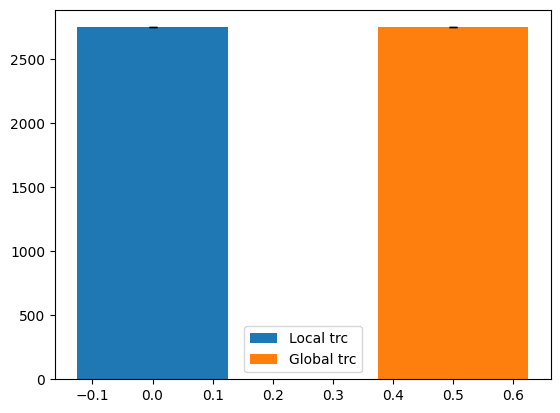

In [44]:
import matplotlib.pyplot as plt

width = 0.25 

plt.bar(0, local_mean, yerr=local_variance, width=width, capsize=3, label='Local trc')
plt.bar(2*width, global_mean, yerr=global_variance, width=width, capsize=3, label='Global trc')

plt.legend()
plt.show()
